In [59]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")

print(df.head(5))  #shows first 5 rows of the dataset
print(df.info())   #shows u the type for each feature and if the feature has missing values
print(df.describe(include="all"))  #Gives u some statistics for each feature

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [60]:
df["TotalCharges"].value_counts().head(15)

TotalCharges
         11
20.2     11
19.75     9
20.05     8
19.9      8
19.65     8
45.3      7
19.55     7
20.15     6
20.25     6
19.45     6
20.3      5
20.45     5
19.85     4
69.9      4
Name: count, dtype: int64

In [61]:
df[df["TotalCharges"] == " "][["tenure", "TotalCharges"]] #Shows all the rows with TotalCharges that have a blank space.

,tenure,TotalCharges
488,0,
753,0,
936,0,
1082,0,
1340,0,
3331,0,
3826,0,
4380,0,
5218,0,
6670,0,


In [62]:
###TotalCharges Data Quality Issue:

#Although TotalCharges shows no missing values in `df.info()`,
#it contains blank string values which represent missing data.
#These occur primarily for customers with zero tenure, where no charges have yet accumulated.
#This column must be cleaned and converted to numeric before modeling.
#TENURE=Time with the company
#Need to fill in a 0 where there is a blank space.

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


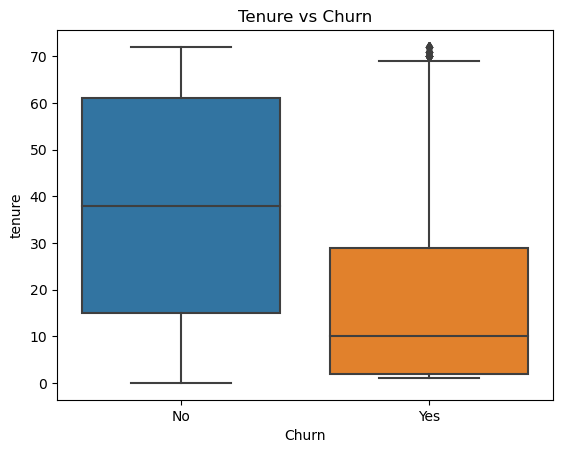

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

In [64]:
###Tenure vs Churn:

#Customers who churn tend to have significantly shorter tenure compared to those who remain.
#This indicates that newer customers are much more likely to churn, making tenure one of the strongest predictors of churn.

In [65]:
pd.crosstab(df["Contract"], df["Churn"], normalize="index")  #The 'normalize' is for each row to be summed to 1.

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


In [66]:
###Insight:
#Customers on month-to-month contracts churn significantly more (~43%) compared to one-year (~11%) and two-year contracts (~3%).
#This indicates that longer-term contracts strongly improve customer retention,
#likely due to higher commitment and switching costs.

In [67]:
#IMP IDEA to reduce churning, could be too Incentivizing customers to move from month-to-month 
#to longer-term contracts could substantially reduce churn.

In [68]:
pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index')

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


In [69]:
#Insight: 
#Customers using electronic check payment methods churn more compared to those using automatic payments
#like bank transfer or credit card.

In [70]:
pd.crosstab(df['InternetService'], df['Churn'], normalize='index')

Churn,No,Yes
InternetService,,
DSL,0.810409,0.189591
Fiber optic,0.581072,0.418928
No,0.925950,0.074050


In [71]:
#Insight: Fiber optic customers churn at more than double the rate of DSL customers.

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


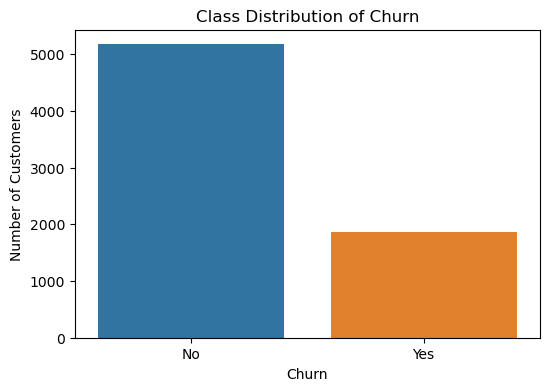

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Class Distribution of Churn')
plt.ylabel('Number of Customers')
plt.xlabel('Churn')
plt.show()

In [73]:
#Insight: This indicates CLASS IMBALANCE, We have a small proportion of churners while majority of our sample is non-churners.

In [74]:
#So when we created our Datacleaner in 'src/preprocessing.py' and we tried to import and test our datacleaner,
#Python could not trace the path too 'src/preprocessing.py' bec 'src/preprocessing.py' is outside the 'notebooks/..' folder,
#CAUSE: '01_eda.ipyn' in /notebooks/, and 'preprocessing.py' is in /src/.
## FIX: Added project root to sys.path

In [75]:
import os

# Show current directory
print("Current directory:", os.getcwd())

# List files in src folder
print("\nFiles in src folder:")
if os.path.exists('src'):
    print(os.listdir('src'))
else:
    print("src folder doesn't exist!")

# Check if preprocessing.py exists
if os.path.exists('src/preprocessing.py'):
    print("\n preprocessing.py found!")
else:
    print("\n preprocessing.py missing!")

Current directory: C:\Users\User\Desktop\Data Science Projects\3)Telecome-churn-prediction proj\notebooks

Files in src folder:
src folder doesn't exist!

 preprocessing.py missing!


In [76]:
import os

# Show complete project structure
project_path = "C:/Users/User/Desktop/Data Science Projects/3)Telecome-churn-prediction proj"
print("PROJECT STRUCTURE:")
for root, dirs, files in os.walk(project_path):
    level = root.replace(project_path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 2 * (level + 1)
    for file in files:
        if file.endswith('.py') or file.endswith('.ipynb'):
            print(f'{subindent}{file}')

PROJECT STRUCTURE:
3)Telecome-churn-prediction proj/
  api/
    app.py
  data/
    processed/
    raw/
  models/
  notebooks/
    01_eda.ipynb
    03_modeling.ipynb
    Untitled.ipynb
    .ipynb_checkpoints/
      01_eda-checkpoint.ipynb
      03_modeling-checkpoint.ipynb
      Untitled-checkpoint.ipynb
  src/
    preprocessing.py
    __pycache__/


In [77]:
import os

# Read the actual file
preprocessing_path = "C:/Users/User/Desktop/Data Science Projects/3)Telecome-churn-prediction proj/src/preprocessing.py"

print("CHECKING preprocessing.py...")
print("File exists:", os.path.exists(preprocessing_path))
print("File size:", os.path.getsize(preprocessing_path), "bytes")

if os.path.exists(preprocessing_path):
    with open(preprocessing_path, 'r') as f:
        content = f.read()
        print("\n=== FILE CONTENT ===")
        print(content)
        print("=== END CONTENT ===")

CHECKING preprocessing.py...
File exists: True
File size: 3691 bytes

=== FILE CONTENT ===
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

class DataCleaner(BaseEstimator, TransformerMixin):
    """Clean raw dataframe before encoding"""
    
    def __init__(self):
        # Define binary and multi-category columns
        self.binary_cols = ['gender', 'Partner', 'Dependents', 
                           'PhoneService', 'PaperlessBilling']
        
        self.multi_cat_cols = ['MultipleLines', 'InternetService',
                              'OnlineSecurity', 'OnlineBackup',
                              'DeviceProtection', 'TechSupport',
                              'StreamingTV', 'StreamingMovies',
                              'Contract', 'PaymentMethod']
        
        self.num_cols 

In [78]:
import sys
import os

# Get current directory
current_dir = os.getcwd()
print(f"1. Current directory: {current_dir}")

# Go up one level to project root
project_root = os.path.dirname(current_dir)
print(f"2. Project root: {project_root}")

# Add project root to Python path
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    print(f"3. Added to path: {project_root}")

# Show current Python path
print(f"\n4. Python path:")
for p in sys.path[:3]:  # Show first 3
    print(f"   - {p}")

# Now import
print("\n5. Attempting import...")
try:
    from src.preprocessing import DataCleaner
    print("   SUCCESS: DataCleaner imported!")
    
    # Quick test
    import pandas as pd
    df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
    cleaner = DataCleaner()
    cleaned = cleaner.transform(df.head(3))
    print(f"   Cleaner works! Remaining columns: {list(cleaned.columns)}")
    
except Exception as e:
    print(f"   Failed: {type(e).__name__}: {e}")

1. Current directory: C:\Users\User\Desktop\Data Science Projects\3)Telecome-churn-prediction proj\notebooks
2. Project root: C:\Users\User\Desktop\Data Science Projects\3)Telecome-churn-prediction proj

4. Python path:
   - C:\Users\User\Desktop\Data Science Projects\3)Telecome-churn-prediction proj
   - C:\Users\User\Desktop\Data Science Projects\3)Telecome-churn-prediction proj\notebooks
   - C:\Users\User\anaconda3\python311.zip

5. Attempting import...
   SUCCESS: DataCleaner imported!
   Cleaner works! Remaining columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [79]:
import os

data_dir = "C:/Users/User/Desktop/Data Science Projects/3)Telecome-churn-prediction proj/data/raw"
print("📂 Files in data/raw:")
print(os.listdir(data_dir))

# Or use relative path from project root
print("\n Looking for CSV files:")
for file in os.listdir(data_dir):
    if file.endswith('.csv'):
        print(f"  - {file}")

📂 Files in data/raw:
['WA_Fn-UseC_-Telco-Customer-Churn.csv']

 Looking for CSV files:
  - WA_Fn-UseC_-Telco-Customer-Churn.csv


In [80]:
#OKAY NOW LETS TRY AGAIN to IMPORT AND TEST OUR DATACLEANER WE MADE IN SRC
from src.preprocessing import DataCleaner
import pandas as pd

# Load data
df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Data loaded. Shape:", df.shape)

# Create cleaner
cleaner = DataCleaner()

# Test on first 5 rows
sample = df.head(5).copy()
print("\n BEFORE cleaning:")
print("Columns:", sample.columns.tolist())
print("TotalCharges dtype:", sample['TotalCharges'].dtype)
print("SeniorCitizen dtype:", sample['SeniorCitizen'].dtype)

# Clean it
cleaned = cleaner.transform(sample)
print("\n AFTER cleaning:")
print("customerID removed?", 'customerID' not in cleaned.columns)
print("TotalCharges dtype:", cleaned['TotalCharges'].dtype)
print("SeniorCitizen dtype:", cleaned['SeniorCitizen'].dtype)
print("First TotalCharges values:", cleaned['TotalCharges'].values.tolist())

Data loaded. Shape: (7043, 21)

 BEFORE cleaning:
Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
TotalCharges dtype: object
SeniorCitizen dtype: int64

 AFTER cleaning:
customerID removed? True
TotalCharges dtype: float64
SeniorCitizen dtype: object
First TotalCharges values: [29.85, 1889.5, 108.15, 1840.75, 151.65]


In [81]:
#OKay lets test our full pipeline now
#First, reload the module to get the new function
import importlib
import sys

# Force reload
if 'src.preprocessing' in sys.modules:
    importlib.reload(sys.modules['src.preprocessing'])

# Now import
from src.preprocessing import create_preprocessing_pipeline
print("create_preprocessing_pipeline imported!")

# Test it
pipeline = create_preprocessing_pipeline()
print(f"Pipeline created: {type(pipeline)}")
print(f"Pipeline steps: {[name for name, _ in pipeline.steps]}")

create_preprocessing_pipeline imported!
Pipeline created: <class 'sklearn.pipeline.Pipeline'>
Pipeline steps: ['cleaner', 'preprocessor']


In [82]:
#NOTE:So my data or each row goes thru the data cleaner then the pipeline that does the one hot encoding, binary transition, scaling, etc. of the data.
#This cell Tests our datacleaner+pipeline= Fullpipeline.

# Get one customer
one_customer = df.head(1).copy()
print("ONE CUSTOMER TRANSFORMATION:")
print("\n1. RAW DATA:")
print(one_customer[['customerID', 'TotalCharges', 'SeniorCitizen', 'Contract']].T)

# Clean only
cleaner = DataCleaner()
cleaned = cleaner.transform(one_customer)
print("\n2. AFTER DataCleaner:")
print(f"   customerID gone? {'customerID' not in cleaned.columns}")
print(f"   TotalCharges type: {cleaned['TotalCharges'].dtype}")
print(f"   SeniorCitizen type: {cleaned['SeniorCitizen'].dtype}")

# Full pipeline
pipeline = create_preprocessing_pipeline()
pipeline.fit(df.head(1000), df.head(1000)['Churn'].map({'Yes': 1, 'No': 0}))
final = pipeline.transform(one_customer)

print("\n3. AFTER Full Pipeline:")
print(f"   Input shape: {one_customer.shape}") #Shows 1 customer with 21 features (1,21).
print(f"   Output shape: {final.shape}")      #Shows After pipeline did the one-hot-encoding, scaling etc.. -> 1 customer 41 features(1,41)
print(f"   Output (first 5 values): {final[0][:5]}")
print(f"   Feature count: {final.shape[1]} features created!")

ONE CUSTOMER TRANSFORMATION:

1. RAW DATA:
                            0
customerID         7590-VHVEG
TotalCharges            29.85
SeniorCitizen               0
Contract       Month-to-month

2. AFTER DataCleaner:
   customerID gone? True
   TotalCharges type: float64
   SeniorCitizen type: object

3. AFTER Full Pipeline:
   Input shape: (1, 21)
   Output shape: (1, 41)
   Output (first 5 values): [-1.25724431 -1.22501641 -1.00668475  0.          1.        ]
   Feature count: 41 features created!
